In [1]:
import matplotlib_themes
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from morknn.net import Net

%config InlineBackend.figure_formats = ['svg']

## Math lesson

$$
\large{
\mathbf{A}_{m, n} \cdot \mathbf{B}_{n, o} = \mathbf{C}_{m, o}\,, \qquad \text{where}\,\,  c_{i, j} = \sum_{k=0}^{n}a_{i, n}b_{n, j}
}
$$
The sum goes from $n\rightarrow k$. See [wikipedia](https://en.wikipedia.org/wiki/Matrix_multiplication)

### Example matrix multiplication

$$
\large{\begin{align}\mathbf{A}_{2, 3} \cdot \mathbf{B}_{3, 4} &= \mathbf{C}_{2, 4}\\[4pt]
\left(\begin{matrix}
a_{00} & a_{01} & a_{02}\\ 
a_{10} & a_{11} & a_{12}\\
\end{matrix}
\right) \cdot
\left(\begin{matrix}
b_{00} & b_{01} & b_{02} & b_{03}\\
b_{10} & b_{11} & b_{12} & b_{13}\\
b_{20} & b_{21} & b_{22} & b_{23}\\
\end{matrix}\right) &=
\left(
\begin{matrix}
c_{00} & c_{01} & c_{02} & c_{03}\\
c_{10} & c_{11} & c_{12} & c_{13}
\end{matrix}
\right)\end{align}}
$$

## Load the mnist dataset and visualize a few images

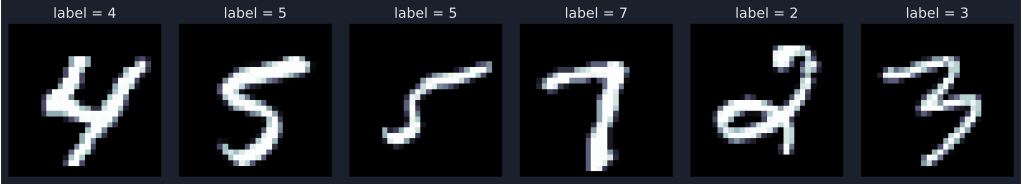

In [2]:
def mnist_dataset(split_factor=0.05):
    scale = 1 / 255
    data_df = pd.read_csv(f'./datasets/mnist/train.csv')
    data_x = data_df[data_df.columns[1:]].to_numpy() * scale
    data_y = data_df['label'].to_numpy()
    data_x = data_x.astype(np.float32)
    data_y = data_y.astype(np.float32)
    split_index = int(data_y.shape[0] * split_factor)
    train_x = data_x[split_index:, :]
    test_x = data_x[:split_index, :]
    train_y = data_y[split_index:]
    test_y = data_y[:split_index]
    return train_x.transpose(), train_y, test_x.transpose(), test_y

def plot_data(data_x, data_y, nplots=6):
    data_x = data_x.transpose()
    nplots = np.maximum(nplots, 6)
    random_index = int(np.random.uniform(nplots, train_x.shape[0]) - nplots)
    images = data_x[random_index:random_index + nplots]
    labels = data_y[random_index:random_index + nplots]
    fig, axes = plt.subplots(1, nplots, figsize=(2.4 * nplots, 2.5), sharex=True, sharey=True)
    for image, label, ax in zip(images, labels, axes):
        image = image.reshape(28, 28)
        ax.set_title(f'label = {label:.0f}')
        ax.imshow(image, cmap='bone')
        ax.axis('off')
    plt.tight_layout()

train_x, train_y, test_x, test_y = mnist_dataset()
plot_data(train_x, train_y)

## Example numpy matmul

```python
[1] a = np.random.rand(2, 3).astype(np.float32)
    b = np.random.rand(3, 5).astype(np.float32)
    c = a@b
    c
```
```text
[1] array(
        [[0.4549801 , 0.6522088 , 1.0393813 , 0.67228025, 0.32949623],
        [0.65349907, 1.0044786 , 1.6312988 , 0.90355206, 0.581241  ]],
        dtype=float32
    )
```
```python
[2] c.shape == (a.shape[0], b.shape[-1])
    # c.shape = (a_rows, b_cols)
```
```text
[2] True
```

## Make a net

this is how I want the library to work
```python
[1] from morknn.net import Net 

    output_dims = [10, 10, 20, 10],
    input_dims = [train_x.shape[0], *output_dims[1:]],
    activations = ['relu', 'relu', 'relu', 'softmax']
    names = ['input', 'hidden_1', 'hidden_2', 'output']

    net = Net(input_dims, output_dims, activations, names=names)
    net.describe()
```
```text
[1] LAYER:
     -        name: 'input'
     - weights_dim: (784, 10)
     -    bias_dim: (784, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'relu'>

    LAYER:
     -        name: 'hidden_1'
     - weights_dim: (10, 10)
     -    bias_dim: (10, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'relu'>

    LAYER:
     -        name: 'hidden_2'
     - weights_dim: (20, 20)
     -    bias_dim: (20, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'relu'>

    LAYER:
     -        name: 'output'
     - weights_dim: (10, 10)
     -    bias_dim: (10, 1)
     -       dtype: <class 'numpy.float32'>
     -  activation: <Activation: 'softmax'>
```